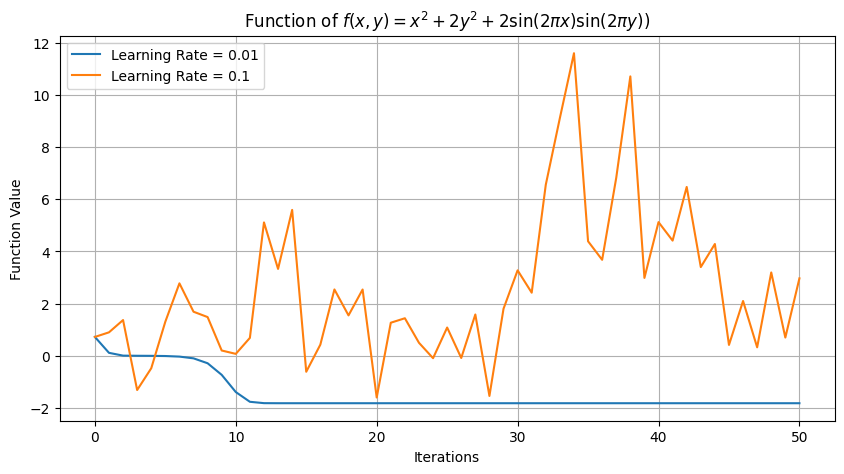

In [42]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
initial_point = (0.1, 0.1)
iterations = 51

# Define the function and its partial derivatives
def f(x, y):
    return np.power(x, 2) + 2 * np.power(y, 2) + (2 * np.sin(2 * np.pi * x) * np.sin(2 * np.pi * y))

def grad_f(x, y):
    df_dx = 2 * x + 4 * np.pi * np.cos(2 * np.pi * x) * np.sin(2 * np.pi * y)
    df_dy = 4 * y + 4 * np.pi * np.sin(2 * np.pi * x) * np.cos(2 * np.pi * y)
    return np.array([df_dx, df_dy])

# Gradient Descent function
def gradient_descent(initial_point, learning_rate, iterations):
    x, y = initial_point
    function_values = []
    
    for i in range(iterations):
        function_values.append(f(x, y))
        # print(f"learning rate: {learning_rate}, x{i} = {x}, y{i} = {y}, f(x, y): {f(x, y)}") # Check the values
        gradient_x, gradient_y = grad_f(x, y)
        x -= learning_rate * gradient_x
        y -= learning_rate * gradient_y
    
    return function_values

# Perform gradient descent for both learning rates
learning_rates = [0.01, 0.1]
results = {n: gradient_descent(initial_point, n, iterations) for n in learning_rates}

# Plotting the function value decrease over iterations for both learning rates
plt.figure(figsize=(10, 5))
for eta, values in results.items():
    plt.plot(values, label=f"Learning Rate = {eta}")
plt.xlabel("Iterations")
plt.ylabel("Function Value")
plt.title(r"Function of $f(x, y) = x^2 + 2y^2 + 2 \sin(2\pi x) \sin(2\pi y)$)")
plt.legend()
plt.grid(True)
plt.show()


In [50]:
import numpy as np
import pandas as pd

# Parameters
initial_points = [(0.1, 0.1), (1, 1), (-0.5, -0.5), (-1, -1)]
learning_rate = 0.01
results_data = []
iterations = 51

# Define the function and its partial derivatives
def f(x, y):
    return np.power(x, 2) + 2 * np.power(y, 2) + (2 * np.sin(2 * np.pi * x) * np.sin(2 * np.pi * y))

def grad_f(x, y):
    df_dx = 2 * x + 4 * np.pi * np.cos(2 * np.pi * x) * np.sin(2 * np.pi * y)
    df_dy = 4 * y + 4 * np.pi * np.sin(2 * np.pi * x) * np.cos(2 * np.pi * y)
    return np.array([df_dx, df_dy])

# Function to perform gradient descent and return final point and function value
def min_points(initial_point, learning_rate, iterations):
    x, y = initial_point
    function_values = []
    values_x = []
    values_y = []
    
    for _ in range(iterations):
        function_values.append(f(x, y))
        values_x.append(x)
        values_y.append(y)
        gradient_x, gradient_y = grad_f(x, y)
        x -= learning_rate * gradient_x
        y -= learning_rate * gradient_y
    
    return (min(values_x), min(values_y), min(function_values))

# Collect results
results_data = []

for n in learning_rates:
    for point in initial_points:
        x_min, y_min, f_min = min_points(point, n, iterations)
        results_data.append({
            "Learning Rate": n,
            "Initial Point": point,
            "Minimum x": x_min,
            "Minimum y": y_min,
            "Minimum Value": f_min
        })

# Convert to DataFrame for display
results_df = pd.DataFrame(results_data)
results_df


,Learning Rate,Initial Point,Minimum x,Minimum y,Minimum Value
0,0.01,"(0.1, 0.1)",0.005266,-0.237926,-1.820079
1,0.01,"(1, 1)",0.980000,0.712812,0.593269
2,0.01,"(-0.5, -0.5)",-0.731377,-0.500000,-1.332481
3,0.01,"(-1, -1)",-1.218070,-1.000000,0.593269
4,0.10,"(0.1, 0.1)",-1.027888,-1.156550,-1.600505
5,0.10,"(1, 1)",-2.547873,-1.573656,-0.921761
6,0.10,"(-0.5, -0.5)",-1.286883,-1.270333,-1.419643
7,0.10,"(-1, -1)",-1.427971,-1.245829,-0.921761
